# Import libraries

In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.metrics import mean_absolute_error, confusion_matrix, classification_report, accuracy_score,ConfusionMatrixDisplay 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Exploration

In [226]:
# read data
df = pd.read_csv(r'C:\Users\Elham\Downloads\TOOLS/data.csv')

In [227]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [229]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [230]:
# drop irrlevent colunms
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)

### Check null & duplicated values

In [231]:
df.isnull().sum()
# no null values 

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [232]:
df.duplicated().sum()

0

In [233]:
df["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

## Balancing dataset

# Visualisation 

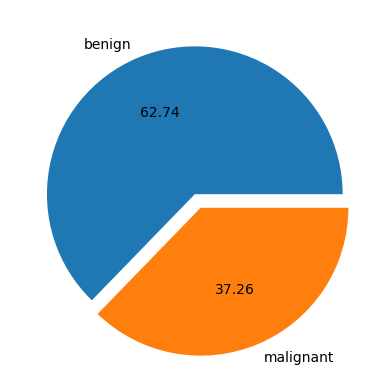

In [234]:
labels=["benign","malignant"]

plt.pie(df["diagnosis"].value_counts() , labels =labels, explode = [0, 0.1] ,autopct='%.02f' );

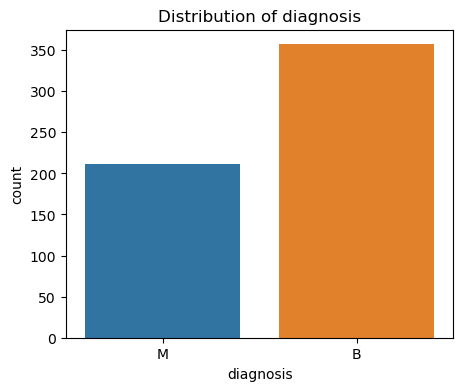

In [235]:
plt.figure(figsize=(5, 4))
sns.countplot(x = df['diagnosis'])
plt.title('Distribution of diagnosis')
plt.show()

<Axes: >

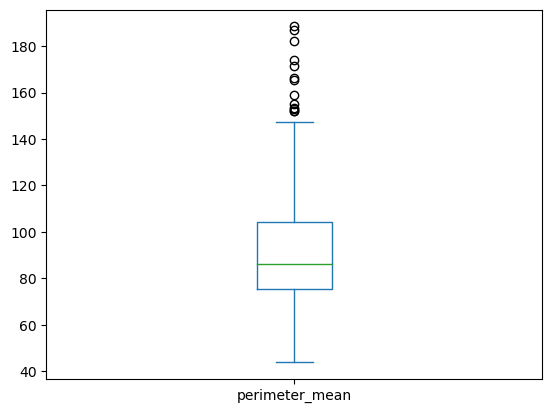

In [236]:
df["perimeter_mean"].plot(kind="box")

<Axes: >

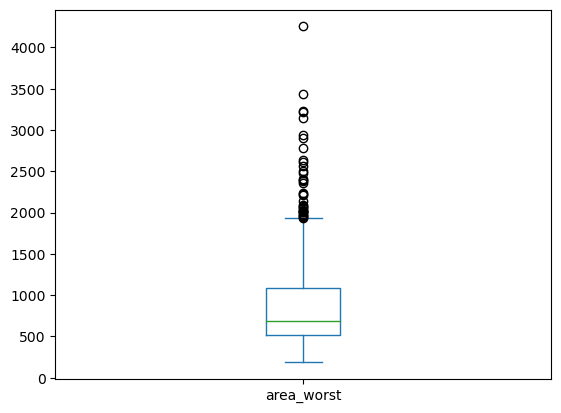

In [237]:
df["area_worst"].plot(kind="box")

In [238]:
# # to show correlation
# # kind of filter method 
# relationship = df.columns
# plt.figure(figsize=(20, 15))
# sns.heatmap(df[relationship[1:]].corr(), annot=True, fmt=".2f")
# plt.show()

In [239]:
# # drop non_important col
# df= df.drop(["perimeter_mean", "area_mean", "concave points_mean", "radius_worst", "area_worst", "perimeter_worst", "texture_worst", "compactness_worst", "concavity_mean", "concavity_worst", "radius_se", "area_se"], axis=1)

In [240]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [241]:
# # after
# param_list = df.columns
# plt.figure(figsize=(20, 15))
# sns.heatmap(df[param_list[1:]].corr(), annot=True, fmt=".2f")
# plt.show()

In [242]:
# # show pairplo
# param_list=['diagnosis',"radius_mean","texture_mean","smoothness_mean","compactness_mean","symmetry_mean","fractal_dimension_mean"]

In [243]:
# sns.pairplot(df[param_list], diag_kind = "kde" , markers = "*", hue="diagnosis")
# plt.show()

# split data

In [244]:
X=df.drop("diagnosis",axis=1)
Y=df["diagnosis"]

In [245]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

## Fisher Score
<body>help select the most useful features for classifying data <body\>

In [246]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_classif

# # Apply SelectKBest class to extract top features using Fisher Score
# bestfeatures = SelectKBest(score_func=f_classif, k='all')
# fit = bestfeatures.fit(X_train,y_train)

# # Get the scores for each feature
# dfscores = pd.DataFrame(fit.scores_)

# # Get the column names
# dfcolumns = pd.DataFrame(X_train.columns)

# # Concatenate two dataframes for better visualization 
# featureScores = pd.concat([dfcolumns,dfscores],axis=1)
# featureScores.columns = ['Feature','Score']  # Naming the dataframe columns
# featureScores = featureScores.sort_values('Score').reset_index(drop=True)
# print(featureScores)

In [247]:
# features=featureScores['Feature'].to_list()

In [248]:
# features.remove("texture_se")
# features.remove("fractal_dimension_mean")
# features.remove("symmetry_se")
# features.remove("smoothness_se")
# features.remove("fractal_dimension_se")    

# PCA

In [249]:
# pca = PCA().fit(X_train_std)
# plt.figure(figsize=(3, 3))
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xlabel('Number of Components')
# plt.ylabel('Cumulative Explained Variance')
# plt.grid(True)
# plt.show()

In [250]:
# from sklearn.decomposition import PCA 

# # Print the shapes of the training and test sets before PCA
# print("Before PCA - Training Set Shape:", X_train.shape)
# print("Before PCA - Test Set Shape:", X_test.shape)

# # Fitting PCA on the training set
# pca = PCA(n_components=10)
# X_train= pca.fit_transform(X_train)

# # Transforming the test set using the fitted PCA object
# X_test= pca.transform(X_test)

# explained_variance=pca.explained_variance_ratio_

# # Print the shapes of the transformed training and test sets
# print("After PCA - Transformed Training Set Shape:", X_train.shape)
# print("After PCA - Transformed Test Set Shape:", X_test.shape)

# # Print explained variance and cumulative explained variance
# print("Explained Variance by Each Principal Component:")
# print(explained_variance)

# print("\nCumulative Explained Variance:")
# print(np.cumsum(explained_variance))


# Standrise features

In [251]:
# feature scalling
scaler = StandardScaler()
X_train_std= scaler.fit_transform(X_train)
X_test_std= scaler.transform(X_test)
X_train_std.shape,X_test_std.shape

((398, 30), (171, 30))

# Models

# Logistic Regression

In [252]:
LR = LogisticRegression()
LR.fit(X_train,y_train)

C:\Users\Elham\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [253]:
pred=LR.predict(X_test)

Confusion matrix without normalization


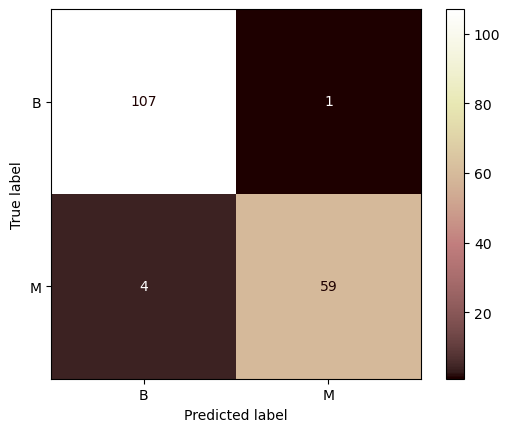

Normalized confusion matrix


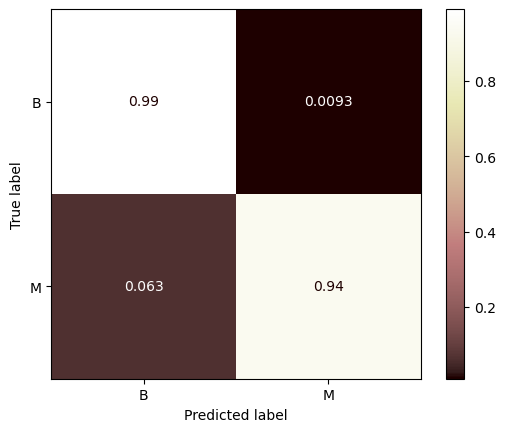

In [254]:
#confusion matrix without normalization
print('Confusion matrix without normalization')
ConfusionMatrixDisplay.from_estimator(

    LR,
    X_test,
    y_test,
    cmap='pink'
    
)
plt.show()

#confusion matrix with normalization
print('Normalized confusion matrix')
ConfusionMatrixDisplay.from_estimator(

    LR,
    X_test,
    y_test,
    normalize='true',
    cmap='pink'
    
)
plt.show()

In [265]:
print(classification_report(
    y_test,
    LR.predict(X_test)

))

              precision    recall  f1-score   support

           B       0.96      0.99      0.98       108
           M       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [266]:
accuracy1 = accuracy_score(y_test,pred)
print(accuracy1)

0.9707602339181286


In [257]:
LR = LogisticRegression()
LR.fit(X_train,y_train)
pred=LR.predict(X_test)

print(classification_report(
    y_test,
    LR.predict(X_test)

))



              precision    recall  f1-score   support

           B       0.96      0.99      0.98       108
           M       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



C:\Users\Elham\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [258]:
accuracy = accuracy_score(y_test,pred)
print(accuracy)

0.9707602339181286


# knn

In [259]:
knn = KNeighborsClassifier(n_neighbors=10,)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [260]:
pred2 = knn.predict(X_test)

AttributeError: 'Flags' object has no attribute 'c_contiguous'

In [261]:
#confusion matrix without normalization
print('Confusion matrix without normalization')
ConfusionMatrixDisplay.from_estimator(

    knn,
    X_test,
    y_test,
    cmap='Blues'
    
)
plt.show()

#confusion matrix with normalization
print('Normalized confusion matrix')
ConfusionMatrixDisplay.from_estimator(

    knn,
    X_test,
    y_test,
    normalize='true',
    cmap='Blues'
    
)
plt.show()

Confusion matrix without normalization


AttributeError: 'Flags' object has no attribute 'c_contiguous'

In [262]:
print(classification_report(

    y_test,
    knn.predict(X_test)

))

AttributeError: 'Flags' object has no attribute 'c_contiguous'

In [263]:
accuracy2= accuracy_score(y_test,pred2)
print(accuracy2)

0.9590643274853801


# Decision Tree

In [264]:
DT = DecisionTreeClassifier(random_state=42)
DT.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [214]:
pred3 = DT.predict(X_test)

Confusion matrix without normalization


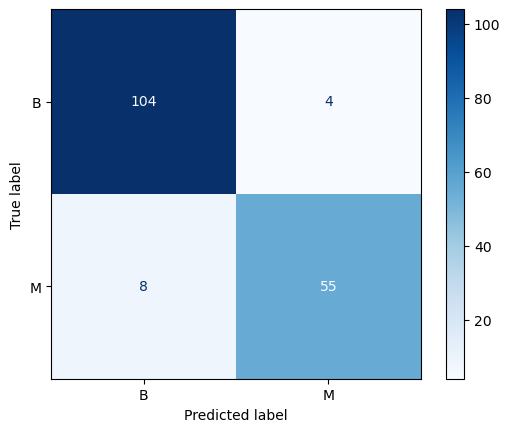

Normalized confusion matrix


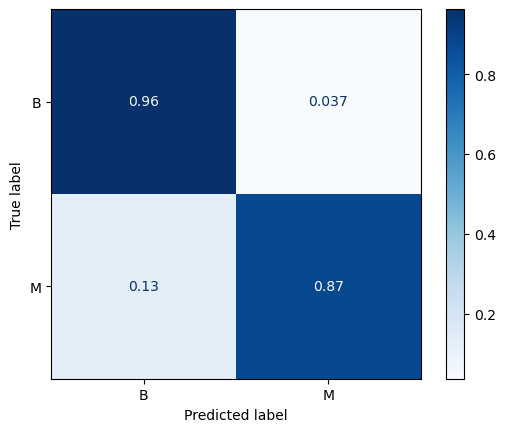

In [215]:
#confusion matrix without normalization
print('Confusion matrix without normalization')
ConfusionMatrixDisplay.from_estimator(
    DT,
    X_test,
    y_test,
    cmap='Blues'
    
)
plt.show()

#confusion matrix with normalization
print('Normalized confusion matrix')
ConfusionMatrixDisplay.from_estimator(

    DT,
    X_test,
    y_test,
    normalize='true',
    cmap='Blues'
    
)
plt.show()

In [216]:
print(classification_report(

    y_test,
    DT.predict(X_test)

))

              precision    recall  f1-score   support

           B       0.93      0.96      0.95       108
           M       0.93      0.87      0.90        63

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171



In [217]:
accuracy3 = accuracy_score(y_test,pred3)
print(accuracy3)

0.9298245614035088


# RandomForest 

In [218]:
RF = RandomForestClassifier(n_estimators=100,random_state=0)
RF.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [219]:
pred4 = RF.predict(X_test)

Confusion matrix without normalization


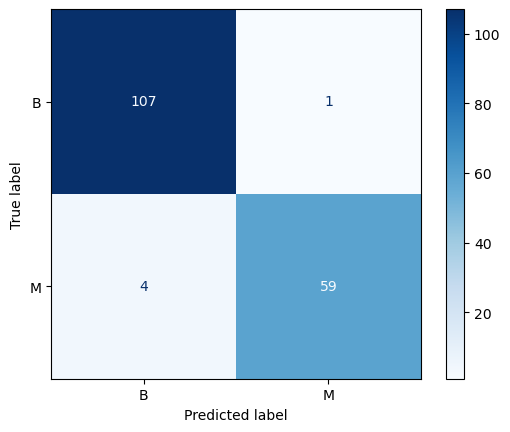

Normalized confusion matrix


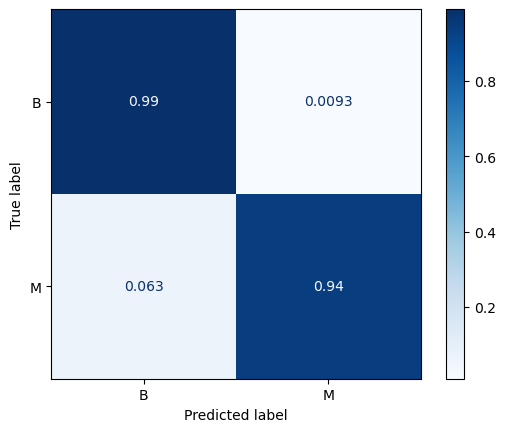

In [220]:
#confusion matrix without normalization
print('Confusion matrix without normalization')
ConfusionMatrixDisplay.from_estimator(

    RF,
    X_test,
    y_test,
    cmap='Blues'
    
)
plt.show()

#confusion matrix with normalization
print('Normalized confusion matrix')
ConfusionMatrixDisplay.from_estimator(

    RF,
    X_test,
    y_test,
    normalize='true',
    cmap='Blues'
    
)
plt.show()

In [221]:
print(classification_report(

    y_test,
    RF.predict(X_test)

))

              precision    recall  f1-score   support

           B       0.96      0.99      0.98       108
           M       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [222]:
accuracy4 = accuracy_score(y_test,pred4)
print(accuracy4)

0.9707602339181286


# Model Comparison

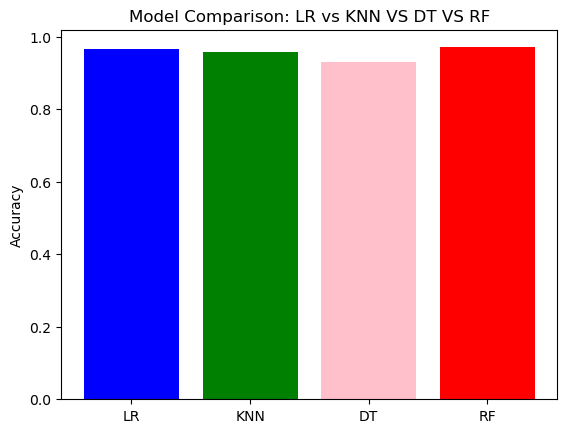



Accuracy of LR: 0.96

Accuracy of KNN: 0.96

Accuracy of DT: 0.93

Accuracy of RF: 0.97

Maximum Accuracy: 0.97
Model with Maximum Accuracy: RF


In [224]:
modelss = ['LR','KNN','DT','RF']
accuracies = [accuracy1,accuracy2,accuracy3,accuracy4]

plt.bar(modelss, accuracies, color=['blue', 'green','pink','red'])
plt.title('Model Comparison: LR vs KNN VS DT VS RF')
plt.ylabel('Accuracy')
plt.show()

max_accuracy = max(accuracies)
max_index = accuracies.index(max_accuracy)
max_model = modelss[max_index]
print(f'\n\nAccuracy of LR: {accuracy1:.2f}\n')
print(f'Accuracy of KNN: {accuracy2:.2f}\n')
print(f'Accuracy of DT: {accuracy3:.2f}\n')
print(f'Accuracy of RF: {accuracy4:.2f}\n')
print(f'Maximum Accuracy: {max_accuracy:.2f}')
print(f'Model with Maximum Accuracy: {max_model}')